In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/block4g.dat', delim_whitespace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
overhead     126 non-null float64
command      126 non-null object
sharedobj    126 non-null object
function     126 non-null object
dtypes: float64(1), object(3)
memory usage: 4.0+ KB


In [4]:
df.head(10)

,overhead,command,sharedobj,function
0,16.09,mysqld,mysqld,bin2decimal
1,9.54,mysqld,mysqld,decimal2bin
2,6.87,mysqld,mysqld,do_add
3,5.20,mysqld,mysqld,decimal_m.l
4,3.83,mysqld,mysqld,decimal_act.al_fraction
5,2.88,mysqld,mysqld,Item_s.m_s.m::.pdate_field
6,7.26,mysqld,ha_rocksdb.so,rocksdb::LRUHandleTable::Resize
7,3.56,mysqld,ha_rocksdb.so,myrocks::ha_rocksdb::convert_record_from_stora...
8,3.01,mysqld,ha_rocksdb.so,rocksdb::BlockIter::BinarySeek
9,2.82,mysqld,ha_rocksdb.so,rocksdb::BlockIter::ParseNextKey


In [5]:
df.function.value_counts()

rocksdb::BlockIter::ParseNextKey                           20
myrocks::ha_rocksdb::convert_record_from_storage_format    14
rocksdb::BlockIter::BinarySeek                             12
myrocks::Rdb_pk_comparator::Compare                        10
rocksdb::DBIter::FindNextUserEntryInternal                  8
rocksdb::BlockIter::Seek                                    7
rocksdb::LRUHandleTable::FindPointer                        7
rocksdb::Version::Get                                       6
myrocks::Rdb_key_def::.npack_record                         5
rocksdb::MergingIterator::Next                              5
rocksdb::DBIter::Next                                       4
handler::ha_rnd_next                                        4
pack_time                                                   3
_init                                                       3
rocksdb::MergingIterator::val.e                             3
bin2decimal                                                 2
rocksdb:

In [6]:
#type(funcs_counts)

In [7]:
#funcs_counts.index
# in the decending sequence of function counts

In [8]:
#tmp = df.groupby(['function'])
# print type(tmp)
# pandas.core.groupby.generic.DataFrameGroupBy
#group_value = tmp.groups
# type(group_value)
# dict: key:value

In [9]:
#group_value.keys()

In [10]:
#df.iloc[group_value['Arg_comparator::compare_string']]

In [11]:
#group_value['Arg_comparator::compare_string']

In [12]:
#for key in funcs_counts.index:
    #print(df.iloc[group_value[key]]['overhead'].mean())
    #print((df.iloc[group_value[key]]['overhead']).median())
    #print(df.iloc[group_value[key]]['overhead'])

    



Text(0.5, 1.05, 'Overhead Distribution of Top Six Functions in TPCH Queries')

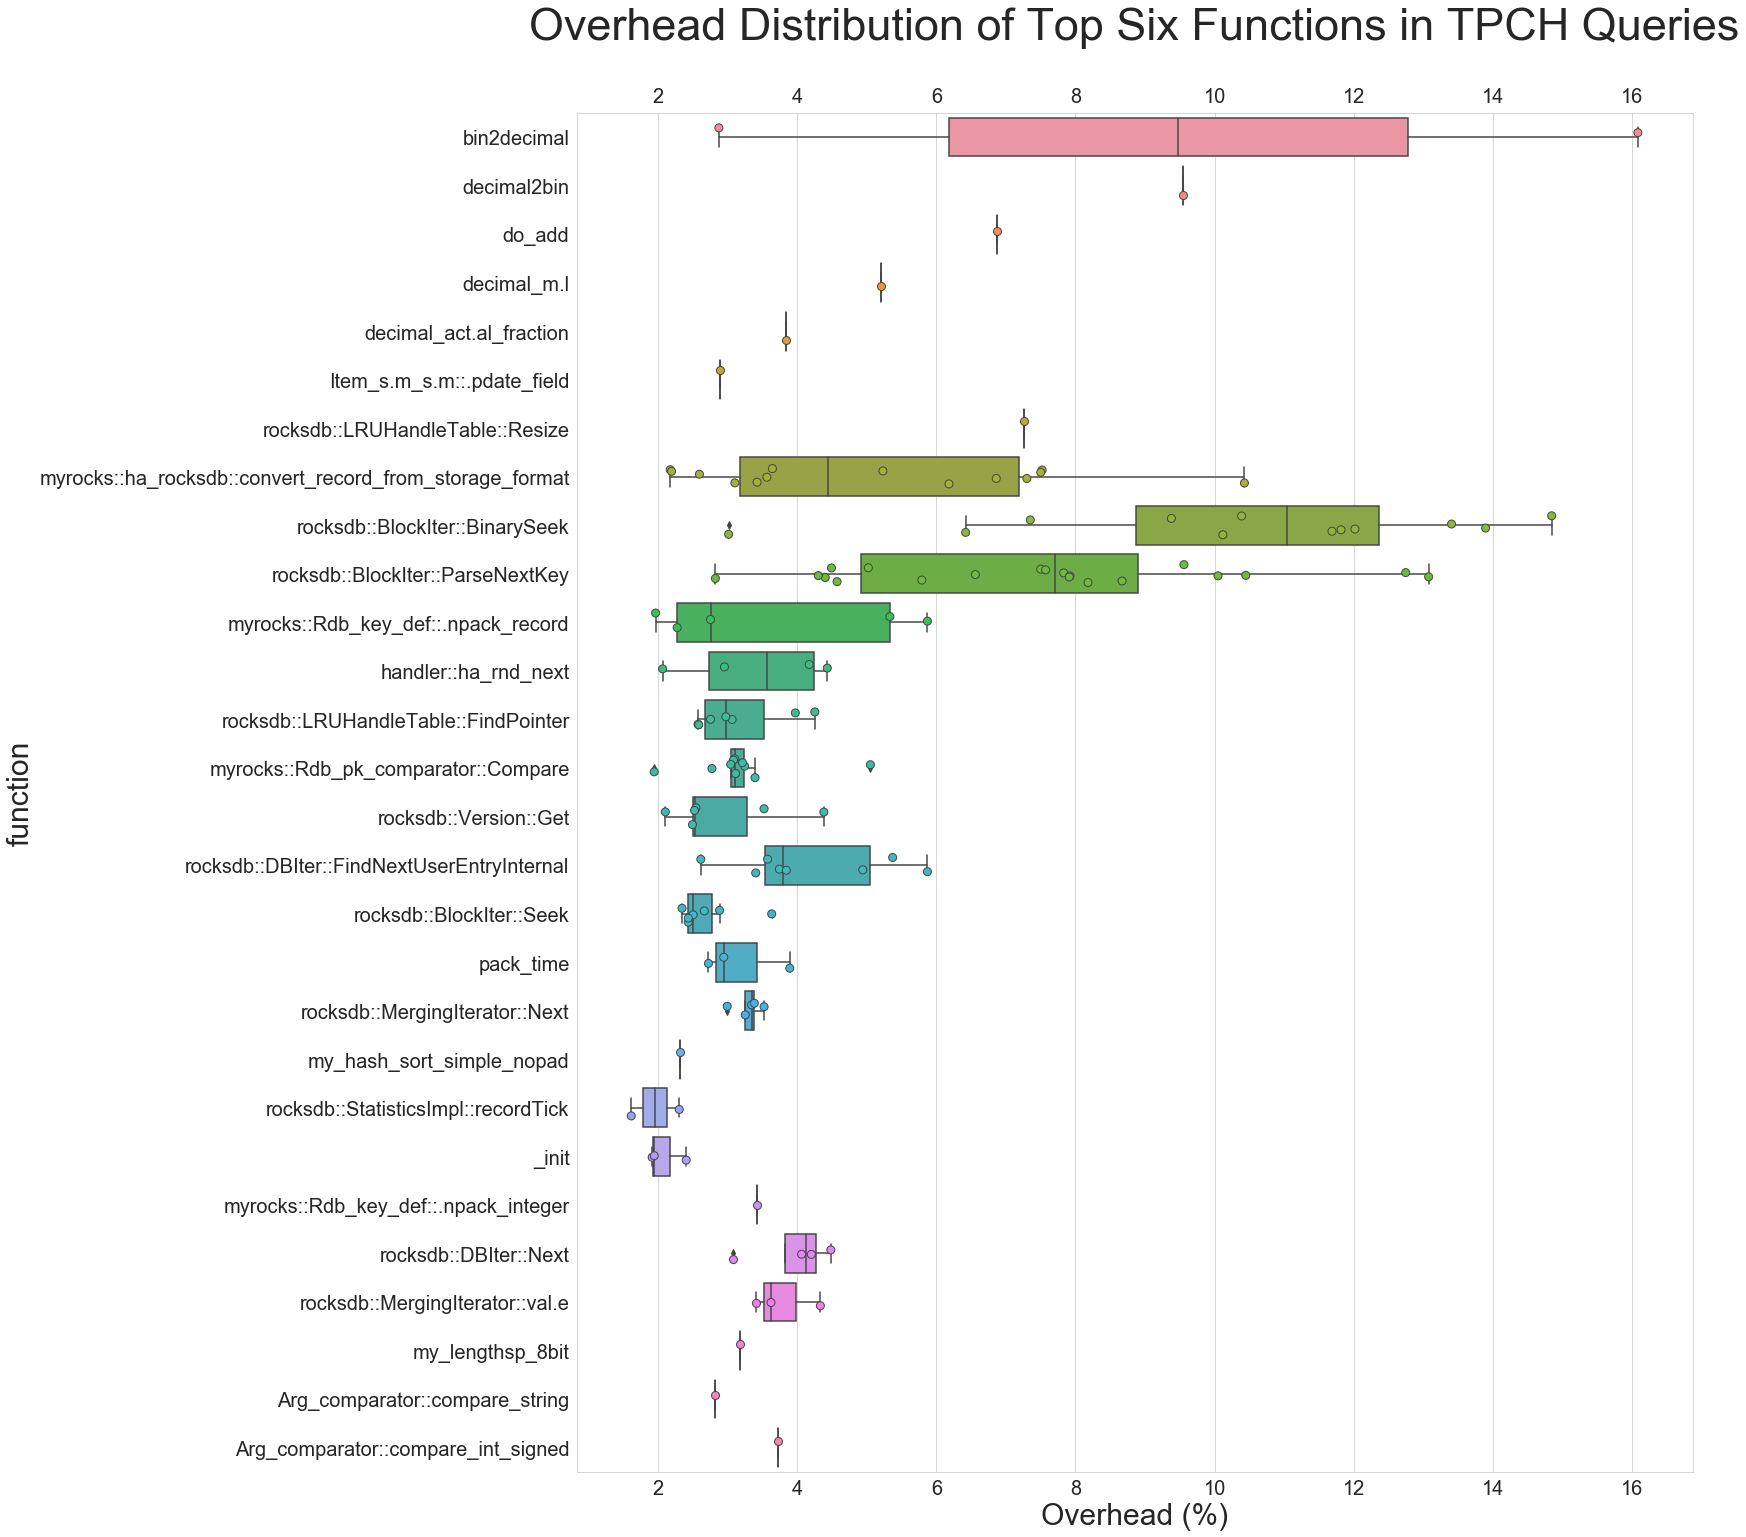

In [13]:

fig = plt.figure(figsize=(20,25))
ax = fig.add_subplot(111)

ax = sns.boxplot(y="function", x="overhead",data=df)

ax = sns.stripplot(y="function", x="overhead",data=df,size=8, jitter=0.2,linewidth=1)


ax.set_xlabel(xlabel='Overhead (%)',fontsize=30)
ax.set_ylabel(ylabel='function',fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20,labeltop=True)
ax.tick_params(axis='both', which='minor', labelsize=15)

ax.set_title('Overhead Distribution of Top Six Functions in TPCH Queries', fontsize=45, y=1.05)


Text(0.5, 1.08, 'Counts of Top Six Functions in TPCH Queries')

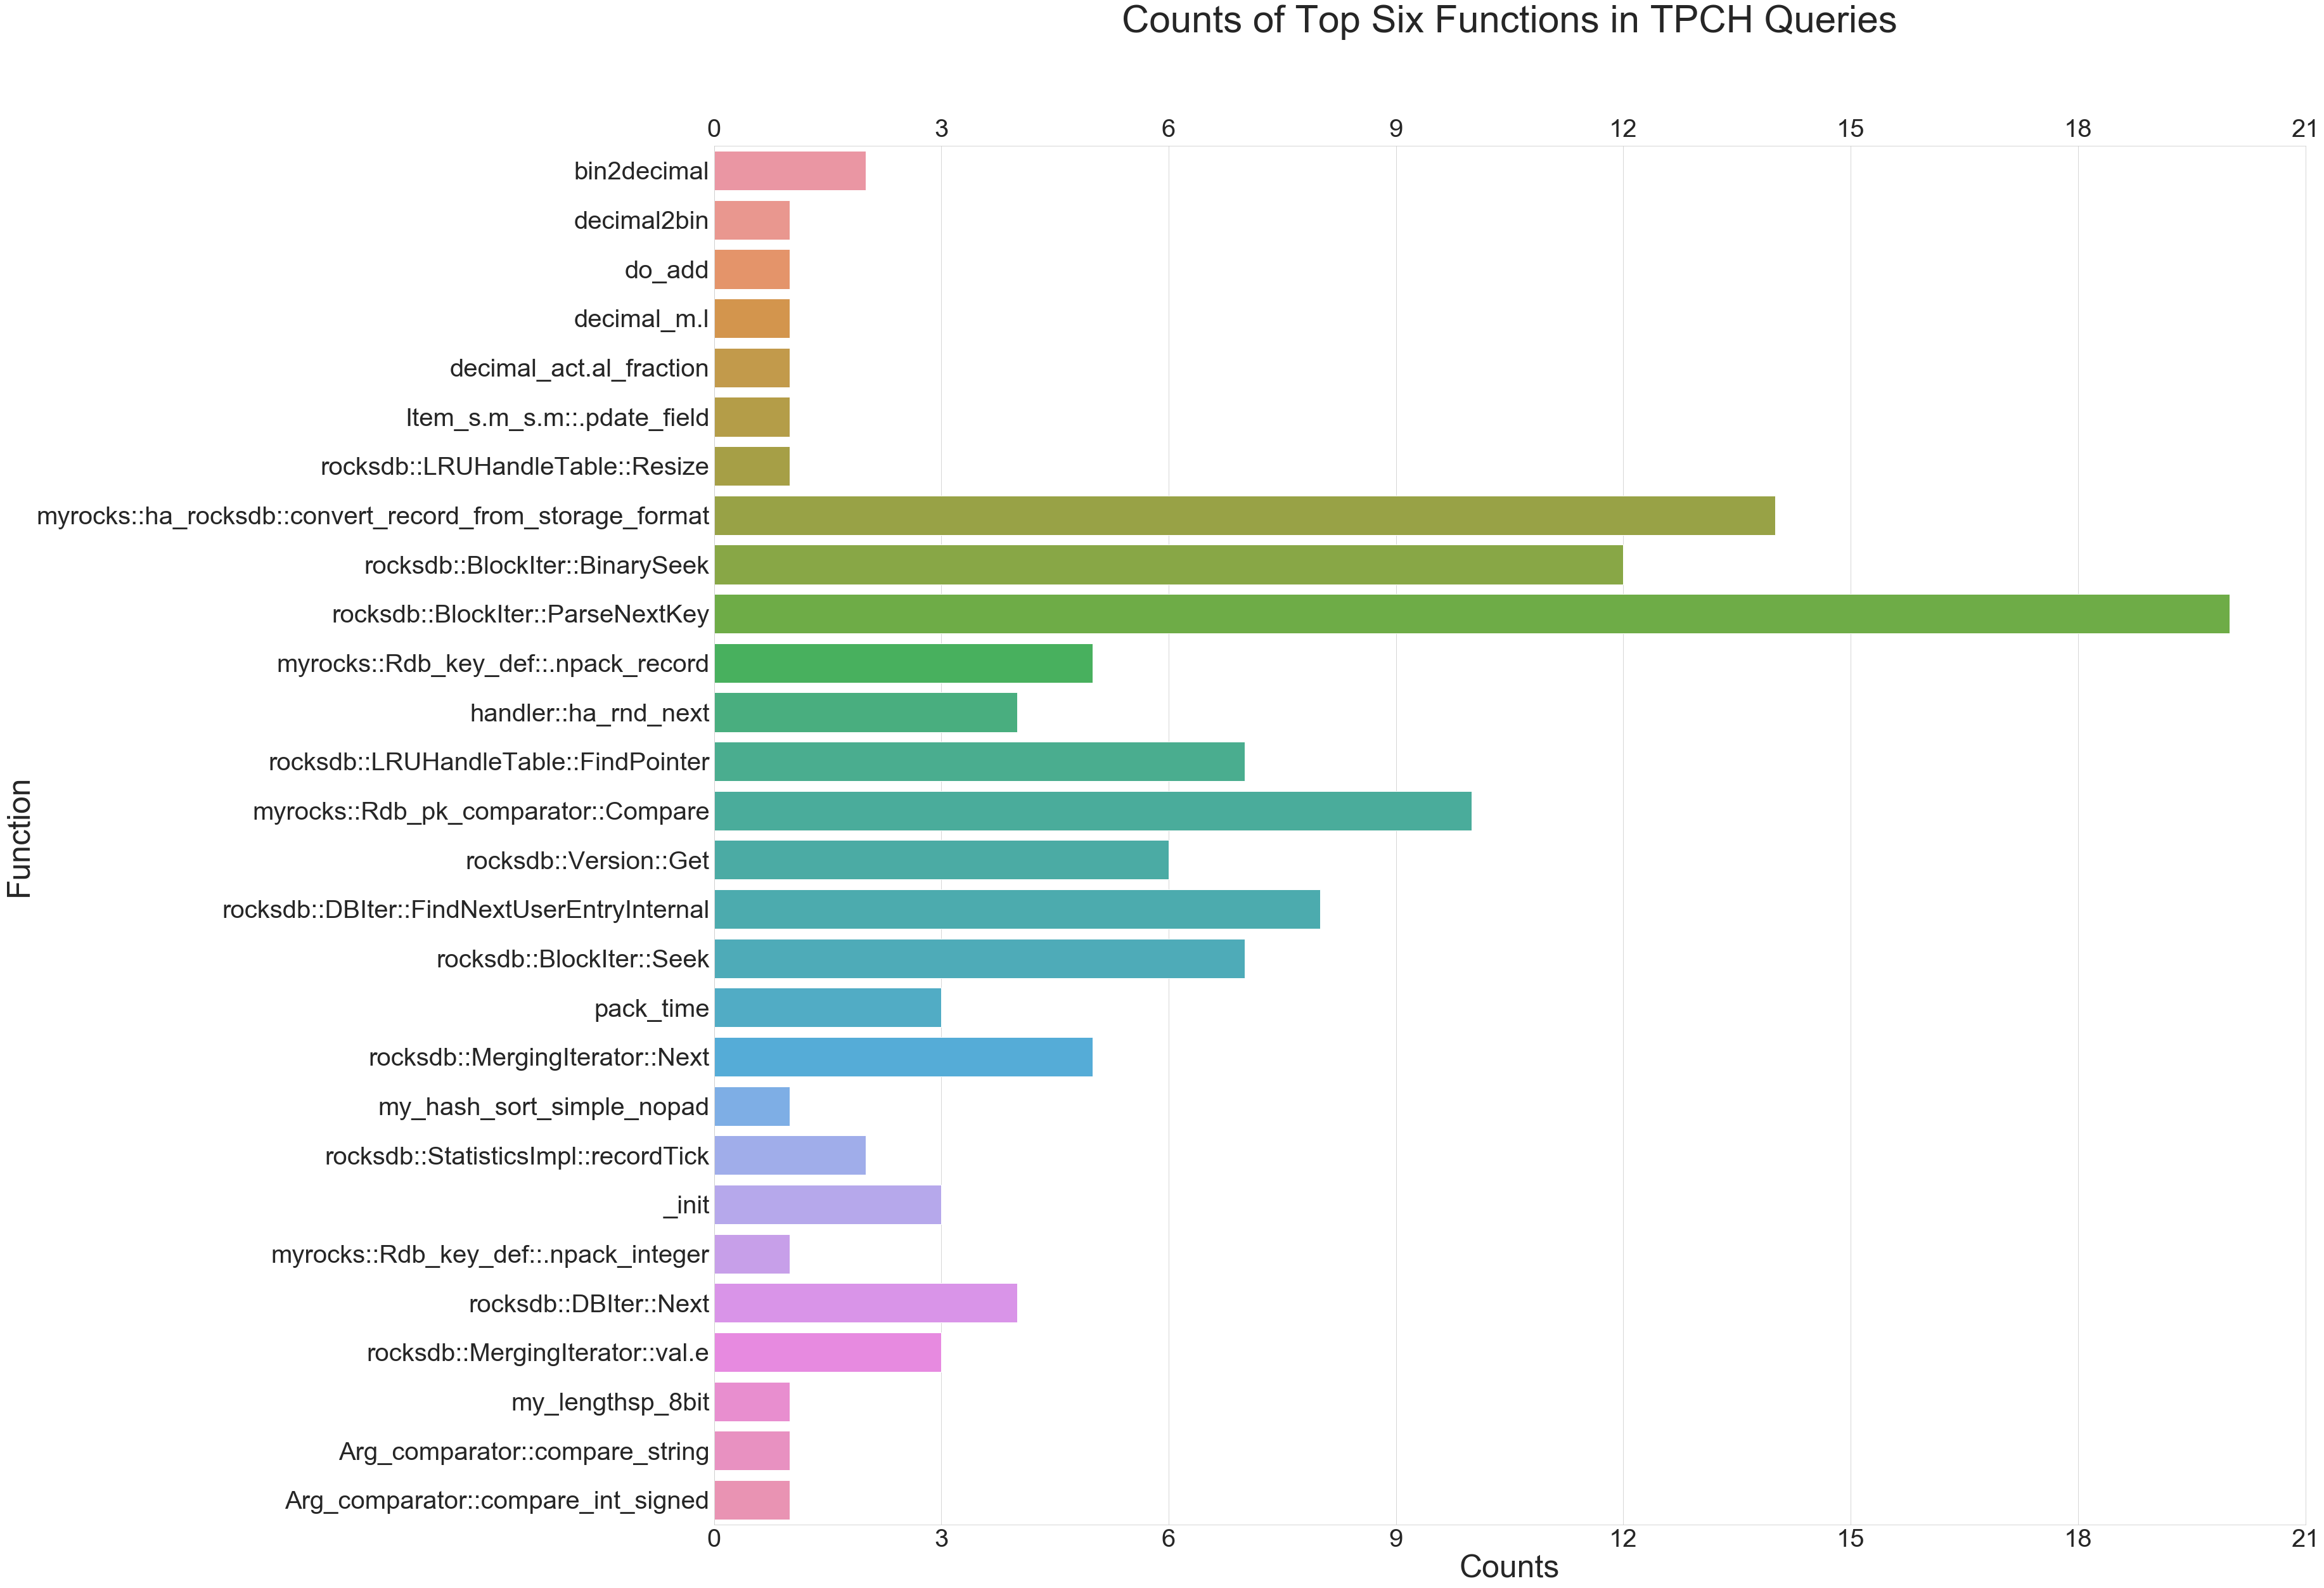

In [14]:
from matplotlib.ticker import MaxNLocator

#ax = plt.figure().gca()
plt.figure(figsize=(45,40))

ax = sns.countplot(y="function", data=df)


ax.set_xlabel(xlabel='Counts',fontsize=50)
ax.set_ylabel(ylabel='Function',fontsize=50)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.tick_params(axis='both', which='major', labelsize=40,labeltop=True)

ax.set_title('Counts of Top Six Functions in TPCH Queries', fontsize=60, y =1.08)